In [39]:
import os
import sys
import math

import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import rotate, shift
from scipy.ndimage.morphology import binary_erosion

from skimage.measure import block_reduce

from skimage.transform import hough_line, hough_line_peaks


In [40]:
img_dir = "raw_data/"
target_dir = "clean_images/"

max_width = 250
max_height = 1200

testimg = plt.imread(os.path.join(target_dir,"0_0.jpg"))
print(testimg.shape)

(1200, 250, 3)


In [51]:
def binarize(img, thres):
    res = np.sum(img,axis=2) > thres
    return res.astype(int)

def downsample(img):
    res = block_reduce(img, block_size=(21, 21), func=np.mean)
    return res

def erode(img):
    res = binary_erosion(img, np.ones((3,3), dtype=np.int))
    return res

def find_angle(img):
    img = binarize(img, 2)
    img = downsample(img)
    img = erode(img)
    h_space, angles, dist = hough_line(img)
    h_space, angles, dist = hough_line_peaks(h_space, angles, dist, num_peaks=1)
    return math.degrees(angles[0])

def augment_rotation(img, ):
    """
    Finds out what the asparagus angle is, zeroes image by rotating it to 0°, then creates 
    three +/- 5° rotations of it, with noise added to the degrees by which the image is rotated
    """
    rotations = np.array([-1, 0, 1]) * 5 + np.random.normal(0,1.5) # TODO fix this, there is a more elegant way
    angle = find_angle(img)
    base = rotate(img, -1*angle, reshape=False, mode="constant")
    return [rotate(base, x, reshape=False, mode="constant") for x in rotations]

def augment_mirroring(img):
    return [np.fliplr(img)]

def augment_translation(img, num=5):
    
    def deviation(x):
        return np.random.choice(np.arange(-x,x))
    
    return [shift(img, [deviation(40), deviation(30), 0]) for _ in range(num)]


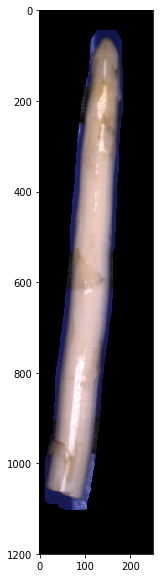

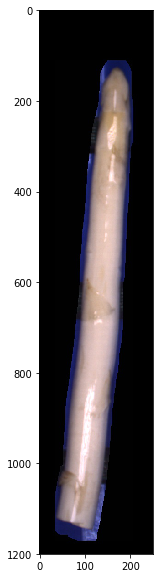

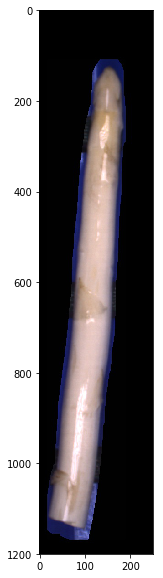

In [52]:
test = augment_translation(testimg)

for t in test:
    plt.figure(figsize=(10,10))
    plt.imshow(t)
    plt.show()